# Основы анализа данных в Python

*Алла Тамбовцева*

## Практикум 6. Меры связи

Импортируем необходимые библиотеки:
    
* модуль `stats` из `scipy` для статистических вычислений;
* библиотека `pandas` для загрузки данных и работы с датафреймами.

In [1]:
import pandas as pd
from scipy import stats as st

### Задача 1

*Из независимого экзамена*

Выберите две переменные, между которыми возможно рассчитать интерпретируемый выборочный коэффициент корреляции Пирсона, и вычислите этот коэффициент по приведённым данным. 

Переменные:

* Цвет автомобиля, закодированный числами (1 – синий, 2 – красный, 3 – зелёный): `[1, 1, 2, 3, 2, 1, 3, 2, 1, 3]`.
* Истинный объём бака автомобиля (л): `[50.1, 53.2, 55.0, 55.0, 50.2, 49, 52.3, 50.9, 51.8, 49.4]`.
* Пройденный километраж (тыс. км): `[15.2, 4.75, 1.2, 1.9, 9.3, 8.2, 11.9, 6.0, 7.6, 5.2]`.

Выберите один ответ:

* 0.21 
* -0.59
* -0.41
* -0.61

Выбираем только переменные в количественной шкале, объем бака автомобиля и пройденный километраж:

In [2]:
sample01 = [50.1, 53.2, 55.0, 55.0, 50.2, 49, 52.3, 50.9, 51.8, 49.4]
sample02 = [15.2, 4.75, 1.2, 1.9, 9.3, 8.2, 11.9, 6.0, 7.6, 5.2]

Вычисляем коэффициент корреляции Пирсона с помощью функции `pearsonr()` из `stats`:

In [3]:
st.pearsonr(sample01, sample02)

(-0.6080292069669586, 0.06218711955844256)

Первое значение, которое возвращает эта функция, это сам коэффициент, второе – это p-value, посчитанное в результате проверки гипотезы $H_0: R = 0$ об отсутствии связи. Если мы округлим коэффициент до сотых, получим $-0.61$, такой ответ в вариантах выше есть. Связь между показателями обратная, умеренная. Если говорить о выводах, то на 5%-ном уровне нулевую гипотезу об отсутствии связи отвергать не стоит, p-value примерно 0.06. Это ожидаемо – выборки очень маленькие, а на выборках маленького объема очень сложно получить значимый коэффициент корреляции (даже если связь чисто теоретически должна быть, и она линейна).

### Задача 2

*Из независимого экзамена*

Бабушка Афросинья хочет проверить, существует ли зависимость между сортом баклажана и типом почвы, в которую сорт был высажен. Для этого она собрала данные по 150 сортам, высаженных в чернозём, и 150 сортам, высаженных в каштановую почву. Таблица частот представлена ниже и для удобства в файле с аналогичным содержанием `TaskB4.xlsx`:

|                   | Алмаз | Матросик | Снежный |
|-------------------|:-----:|:--------:|:-------:|
| Чернозёмная почва |   75  |    20    |    55   |
| Каштановая почва  |   20  |    120   |    10   |


Рассчитайте статистику $\chi^2$ критерия согласия Пирсона и выпишите её в ответ, округлив до сотых.


Пример ответа: 101.02

**Небольшое отступление.** Кто сомневался: баклажаны сорта «Матросик» все-таки полосатые. И да, баклажаны сорта «Снежный» белые, а баклажаны сорта «Алмаз» блестящие. Логика в названиях очень даже есть.

**Решение 1 (без файла).** Чтобы не тратить время на загрузку файла, можно создать таблицу сопряженности вручную – сформировать маленький датафрейм из списков с помощью функции `DataFrame()` из `pandas`:

In [4]:
tab = pd.DataFrame([[75, 20, 55], 
             [20, 120, 10]]) 
tab

,0,1,2
0,75,20,55
1,20,120,10


Теперь полученную таблицу можно подать на вход функции `chi2_contingency()` для критерия согласия хи-квадрат Пирсона:

In [5]:
st.chi2_contingency(tab)

(134.42452284557547, 6.457817206943809e-30, 2, array([[47.5, 70. , 32.5],
        [47.5, 70. , 32.5]]))

Итак, давайте разберемся с выдачей и результатами. Начнем с того, какую гипотезу мы проверяли:

$$
H_0: \text{связи нет, признаки независимы} 
$$
$$
H_1: \text{связь есть, признаки не независимы}
$$

Для проверки этой гипотезы вы воспользовались критерием хи-квадрат, по итогу проверки получили p-value как меру жизнеспособности нулевой гипотезы с точки зрения данных. Здесь p-value – это второе число в выдаче, то есть, p-value равно 6.457817206943809e-30, что примерно 0. На 5%-ном уровне значимости гипотезу можно отвергнуть, а значит, связь между сортом баклажана и типом почвы существует.

Это p-value было посчитано на основе наблюдаемого значения статистики критерия, оно в выдаче тоже есть, здесь `statistic=134.42`. Это значение с точностью до второго знака пойдет в ответ этой задачи.

То есть, p-value было получено как $\text{P}(\text{statistic} > 134.42)$. Эта вероятность посчитана с учетом свойств распределения хи-квадрат, используемого для работы с данными на основе нашей таблицы сопряженности `tab`. В частности, чтобы такую вероятность посчитать, нужно знать важный параметр – число степеней свободы, в выдаче оно также присутствует, это `dof = 2` (от *degrees of freedom*). Считается оно так:

$$
\text{dof} = (r-1)\times(c-1)
$$

где $r$ – число строк в таблице сопряженности, $c$ – число столбцов в таблице сопряженности. Здесь получаем:

$$
\text{dof} = (2-1)\times(3-1) = 2
$$

Наконец, последний элемент в выдаче – это массив `expected_freq` с таблицей ожидаемых частот, то есть тех значений в таблице сопряженности, которые можно ожидать в случае, если нулевая гипотеза верна и признаки действительно независимы. Например, в случае, если сорт баклажана не зависит от типа почвы, мы можем ожидать, что в черноземной почве должно вырасти 70 баклажанов сорта «Матросик» (значение 70 в первом списке) и примерно 33 баклажана сорта «Снежный» (значение 32.5 во втором списке). Именно на основе сравнений наблюдаемых и ожидаемых частот и считается значение статистики `statistic` и `p-value`, вспомните лекцию.

**Решение 2 (с файлом).** Файл `TaskB4.xlsx` можно считать как обычный файл Excel:

In [6]:
pd.read_excel("TaskB4.xlsx")

,Unnamed: 0,Алмаз,Матросик,Снежный
0,Чернозёмная почва,75,20,55
1,Каштановая почва,20,120,10


Однако есть небольшая проблема – функция `chi2_contingency()` принимает на вход только таблицы, состоящие исключительно из чисел (названия столбцов не в счет), а здесь есть текстовый столбец с типами почвы. Это можно поправить, причем сразу на этапе загрузки файла – сообщить, что столбец с номером 0 нужно записать как названия строк (`index`):

In [7]:
Tab = pd.read_excel("TaskB4.xlsx", index_col = 0)
Tab

,Алмаз,Матросик,Снежный
Чернозёмная почва,75,20,55
Каштановая почва,20,120,10


А дальше все по той же схеме, что и выше:

In [8]:
st.chi2_contingency(Tab)

(134.42452284557547, 6.457817206943809e-30, 2, array([[47.5, 70. , 32.5],
        [47.5, 70. , 32.5]]))

**Дополнительно для желающих.** Кому хочется побольше эстетики, при создании датафреймов на основе списков можно сразу добавлять названия строк и столбцов:

In [9]:
tab = pd.DataFrame([[75, 20, 55], [20, 120, 10]], 
                   index = ["Чернозёмная почва", "Каштановая почва"], 
                   columns = ["Алмаз", "Матросик", "Снежный"]) 
tab

,Алмаз,Матросик,Снежный
Чернозёмная почва,75,20,55
Каштановая почва,20,120,10


И да, готовые таблицы можно выгружать в LaTex:

In [10]:
# код LaTeX
# можно выставить настройки для границ столбцов в tabular
# настройки для границ строк в \toprule и \bottomrule, см help

print(tab.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Алмаз &  Матросик &  Снежный \\
\midrule
Чернозёмная почва &     75 &        20 &       55 \\
Каштановая почва  &     20 &       120 &       10 \\
\bottomrule
\end{tabular}



И в Markdown тоже:

In [11]:
print(tab.to_markdown())

|                   |   Алмаз |   Матросик |   Снежный |
|:------------------|--------:|-----------:|----------:|
| Чернозёмная почва |      75 |         20 |        55 |
| Каштановая почва  |      20 |        120 |        10 |


И в HTML:

In [12]:
print(tab.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Алмаз</th>
      <th>Матросик</th>
      <th>Снежный</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Чернозёмная почва</th>
      <td>75</td>
      <td>20</td>
      <td>55</td>
    </tr>
    <tr>
      <th>Каштановая почва</th>
      <td>20</td>
      <td>120</td>
      <td>10</td>
    </tr>
  </tbody>
</table>


Файл `c.xlsx` содержит данные о рейтингах видео-игр по данным Metacritic. Набор данных содержит следующие переменные:

* `Name` – название игры.
* `Platform` – платформа для запуска игры.
* `Year_of_Release` – год запуска игры.
* `Genre` – жанр игры.
* `Publisher` – компания, выпустившая игру.
* `NA_Sales` – продажи в Северной Америке (миллионы копий).
* `EU_Sales` – продажи в Европейском Союзе (миллионы копий).
* `JP_Sales` – продажи в Японии (миллионы копий).
* `Other_Sales` – продажи в прочих странах (миллионы копий).
* `Global_Sales` – общие продажи по миру (миллионы копий).
* `Critic_Score` – агрегированный рейтинг команды Metacritic.
* `Critic_Count` – количество экспертов, участвовавших в расчёте `Critic_Score`.
* `User_Score` – агрегированный рейтинг пользователей Metacritic.
* `User_Count` – количество пользователей, участвовавших в расчёте `User_Score`.
* `Developer` – разработчик игры.
* `Rating` – рейтинг ESRB (Everyone, Teen, Adults Only, ...).

### Задача 3

*Из независимого экзамена*

Постройте диаграмму рассеяния для переменных `Critic_Score` (на горизонтальной оси) и `EU_Sales` (на вертикальной оси). Выберите все верные утверждения.

Выберите один или несколько ответов:

* Между переменными `Critic_Score` и `EU_Sales` существует сильная положительная линейная взаимосвязь.
* Изменение переменной `Critic_Score` совершенно не влияет на изменение переменной `EU_Sales`.
* Построенная диаграмма показывает, что в выборке, возможно, есть выбросы. 
* Между переменными `Critic_Score` и `EU_Sales` существует сильная отрицательная линейная взаимосвязь.

In [13]:
games = pd.read_excel("c.xlsx")

In [14]:
# тут достаточно простого варианта – без дополнительных настроек
# функция scatter() из набора plot

games.plot.scatter(x = "Critic_Score", y = "EU_Sales");

Судя по графику, сильной связи точно не наблюдается, плюс, есть один выброс. Второй вариант *Построенная диаграмма показывает, что в выборке, возможно, есть выбросы.* подходит. Про полное отсутствие связи говорить не приходится – она все же есть, если выброс убрать, она будет более выраженной. Проверим:

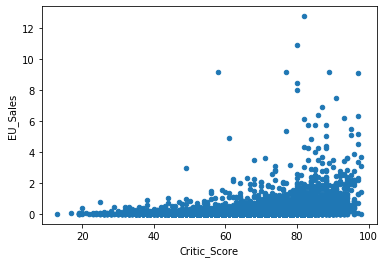

In [15]:
games_filt = games[games["EU_Sales"] <= 25]
games_filt.plot.scatter(x = "Critic_Score", y = "EU_Sales");

### Задача 4

*Из независимого экзамена*

Выведите корреляционную матрицу для числовых переменных. Найдите переменную, которая имеет наибольшую по модулю корреляцию с переменной `EU_Sales` (не включая саму `EU_Sales`). В ответ выпишите модуль найденного значения корреляции.

In [16]:
# метод corr() в pandas
# значимость не проверяет, но вычисляет коэффициенты Пирсона для всех пар числовых переменных

games.corr()

,Unnamed: 0,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Unnamed: 0,1.000000,0.186977,-0.401725,-0.377490,-0.268184,-0.332559,-0.427229,-0.364572,-0.424137,-0.187200
Year_of_Release,0.186977,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411,0.223407,0.175339
NA_Sales,-0.401725,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.246429
EU_Sales,-0.377490,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.283360
JP_Sales,-0.268184,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.075638
Other_Sales,-0.332559,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.238982
Global_Sales,-0.427229,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.265012
Critic_Score,-0.364572,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376
Critic_Count,-0.424137,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334
User_Count,-0.187200,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,1.000000


Находим строку или столбец `EU_Sales` (матрица симметричная) и смотрим, какой коэффицент самый большой: 0.90 (в задании в самом экзамене требуется два знака после запятой).